In [1]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

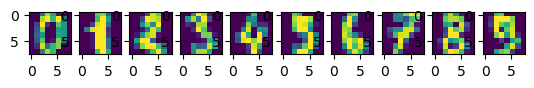

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

# Affichage des 10 premières images
import matplotlib.pyplot as plt
fig = plt.figure()
for i, digit in enumerate(digits.images[:10]):
    fig.add_subplot(1,10,i+1)
    plt.imshow(digit)
plt.show()


In [17]:
import numpy as np
from sklearn import tree
from sklearn.ensemble import BaggingClassifier

X, y = digits.data, digits.target
clf_dtc = tree.DecisionTreeClassifier()
clf_dtc.fit(X, y)
accuracy_dtc = clf_dtc.score(X,y)
print(accuracy_dtc)

1.0


In [18]:
from sklearn.model_selection import train_test_split
# 90% des données pour le test, 10% pour l'apprentissage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf_dtc = tree.DecisionTreeClassifier()
clf_dtc.fit(X_train, y_train)

Z = clf_dtc.predict(X_test)
accuracy_dtc = clf_dtc.score(X_test,y_test)
print(accuracy_dtc)

0.8583333333333333


In [19]:
for i in range(100):
    clf_bc = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
    clf_bc.fit(X_train, y_train)
    Z_bc = clf_bc.predict(X_test)
    accuracy_bc = clf_bc.score(X_test,y_test)
    print(accuracy_bc)

0.9583333333333334
0.9583333333333334
0.9555555555555556
0.9583333333333334
0.9583333333333334
0.9583333333333334
0.9611111111111111
0.9611111111111111
0.9583333333333334
0.9527777777777777
0.9611111111111111
0.9583333333333334
0.9611111111111111
0.9638888888888889
0.9583333333333334
0.9611111111111111
0.9583333333333334
0.9555555555555556
0.9583333333333334
0.9583333333333334
0.9583333333333334
0.9583333333333334
0.9611111111111111
0.9583333333333334
0.9611111111111111
0.9555555555555556
0.9583333333333334
0.9583333333333334
0.9583333333333334
0.9583333333333334
0.9583333333333334
0.9583333333333334
0.9583333333333334
0.9611111111111111
0.9583333333333334
0.9583333333333334
0.9638888888888889
0.9555555555555556
0.9555555555555556
0.9583333333333334
0.9611111111111111
0.9611111111111111
0.9555555555555556
0.9555555555555556
0.9583333333333334
0.9555555555555556
0.9611111111111111
0.9583333333333334
0.9611111111111111
0.9583333333333334
0.9527777777777777
0.9611111111111111
0.9555555555

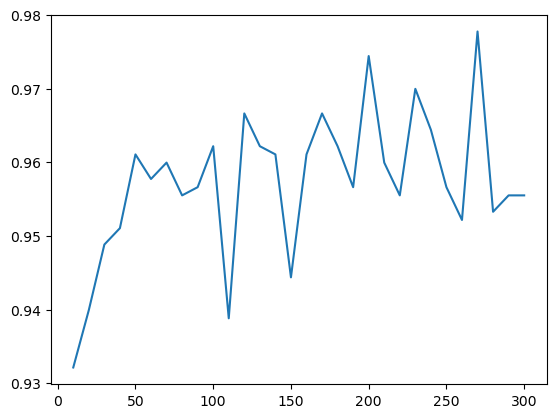

In [22]:
N = 30
accuracy_bc = []

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf_bc = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=(i+1)*10)
    clf_bc.fit(X_train, y_train)
    Z_bc = clf_bc.predict(X_test)
    accuracy_bc.append(clf.score(X_test,y_test))

plt.plot([10*(i+1) for i in range(N)], accuracy)
plt.show()

In [7]:
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

from sklearn.model_selection import GridSearchCV
pgrid = {"max_samples": [0.2, 0.4, 0.6, 0.8],
        "max_features": [0.2, 0.4, 0.6, 0.8]}
grid_search = GridSearchCV(BaggingClassifier(tree.DecisionTreeClassifier()), param_grid=pgrid, cv=5)
grid_search.fit(X_train, y_train)
print("Meilleur score : " + str(grid_search.best_estimator_.score(X_test, y_test)))
print("max_samples: " + str(grid_search.best_estimator_.max_samples))
print("max_features: " + str(grid_search.best_estimator_.max_features))

Meilleur score : 0.917686318131257
max_samples: 0.8
max_features: 0.4


In [8]:
digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

In [11]:
from sklearn.ensemble import RandomForestClassifier

# 90% des données pour le test, 10% pour l'apprentissage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf_dtc = tree.DecisionTreeClassifier()
clf_dtc.fit(X_train, y_train)

Z_dtc = clf_dtc.predict(X_test)
accuracy_dtc = clf_dtc.score(X_test,y_test)

#RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=200)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
accuracy_rf = clf_rf.score(X_test,y_test)


#BaggingCLassifier

clf_bc = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
clf_bc.fit(X_train, y_train)
Z_bc = clf_bc.predict(X_test)
accuracy_bc=clf_bc.score(X_test,y_test)
print("L'accuracy de RandomForestClassifier est de : ", accuracy_rf)
print("L'accuracy de BaggingClassifier est de : ", accuracy_bc)

if accuracy_rf > accuracy_bc:
    print("L'accuracy du RandomForestClassifier est supèrieur avec une différence de ", (accuracy_rf - accuracy_bc) * 100 , " %")
elif accuracy_rf == accuracy_bc:
    print("Les deux modèle sont les mêmes résultat avec ", accuracy_rf * 100, " %")
else :
    print("L'accuracy du BaggingClassifier est supèrieur avec ", accuracy_rf * 100, " %")


L'accuracy de RandomForestClassifier est de :  0.8943139678615575
L'accuracy de BaggingClassifier est de :  0.8893695920889988
L'accuracy du RandomForestClassifier est supèrieur avec une différence de  0.49443757725586845  %


In [27]:
N = 10

bagging_accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf_bc = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=30)
    clf_bc.fit(X_train, y_train)
    bagging_accuracies.append(clf_bc.score(X_test,y_test))

print(np.mean(bagging_accuracies), np.std(bagging_accuracies))


rf_accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf_rf = RandomForestClassifier(n_estimators=30)
    clf_rf.fit(X_train, y_train)
    rf_accuracies.append(clf_rf.score(X_test,y_test))

print(np.mean(rf_accuracies), np.std(rf_accuracies))

0.9305895439377085 0.01195139134021205
0.9597330367074528 0.006482225710493204


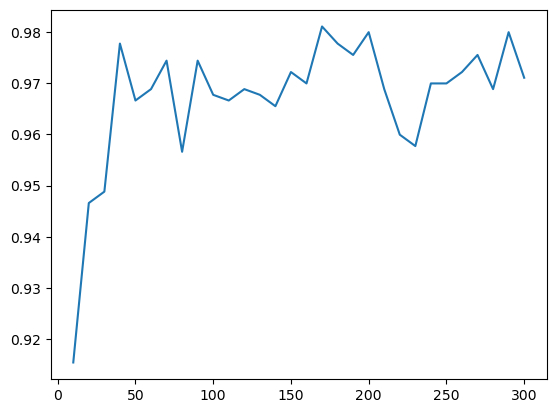

In [38]:
N = 30

rf_accuracies = []

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf_rf = RandomForestClassifier(n_estimators= (i+1) * 10)
    clf_rf.fit(X_train, y_train)
    rf_accuracies.append(clf_rf.score(X_test,y_test))

# print(np.mean(rf_accuracies), np.std(rf_accuracies))

plt.plot([10 * (i+1) for i in range(N)], rf_accuracies)
plt.show()

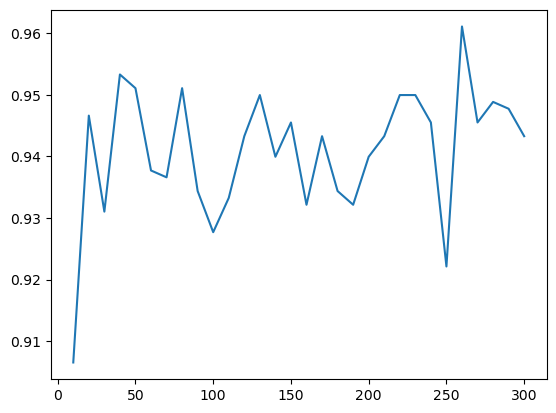

In [37]:
N = 30

bagging_accuracies = []

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf_bc = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators= (i+1) * 10)
    clf_bc.fit(X_train, y_train)
    bagging_accuracies.append(clf_bc.score(X_test,y_test))

# print(np.mean(bagging_accuracies), np.std(bagging_accuracies))

plt.plot([10 * (i+1) for i in range(N)], bagging_accuracies)
plt.show()

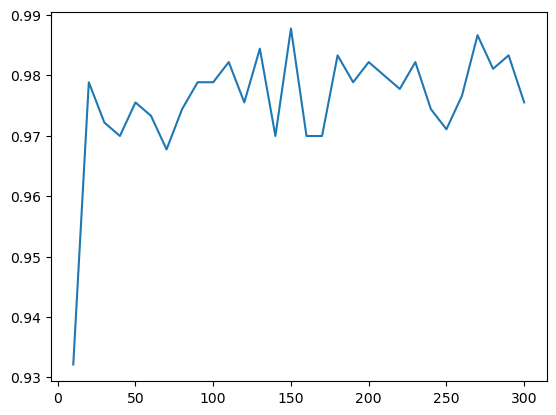

In [39]:
from sklearn.ensemble import ExtraTreesClassifier

N = 30

etc_accuracies = []

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf_etc = ExtraTreesClassifier(n_estimators= (i+1) * 10)
    clf_etc.fit(X_train, y_train)
    etc_accuracies.append(clf_etc.score(X_test,y_test))

# print(np.mean(rf_accuracies), np.std(rf_accuracies))

plt.plot([10 * (i+1) for i in range(N)], etc_accuracies)
plt.show()